In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris

In [99]:
covid=pd.read_csv("dtacovid.csv")
covid['Day'] = pd.to_datetime(covid['Day'])
covid = covid[covid['Day'].dt.year == 2021]
covid = covid[covid['Entity'] == "United States"]
covid

,Entity,Day,"Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)"
474764,United States,2021-01-01,538.26434
474765,United States,2021-01-02,549.53370
474766,United States,2021-01-03,577.64380
474767,United States,2021-01-04,610.35297
474768,United States,2021-01-05,631.73380
...,...,...,...
475124,United States,2021-12-27,604.69150
475125,United States,2021-12-28,650.31384
475126,United States,2021-12-29,733.27400
475127,United States,2021-12-30,811.15625


In [5]:
delay=pd.read_csv("delaydta.csv")
delay

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,8.63,3.24,...,0.0,9.72,4.0,0.0,1884.0,561.0,223.0,282.0,0.0,818.0
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,124.0,0.0,0.0,0.0,0.0,124.0
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,7.21,1.82,...,0.0,5.32,2.0,0.0,1698.0,981.0,54.0,294.0,0.0,369.0
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,12.78,2.69,...,0.0,17.19,9.0,0.0,2877.0,827.0,198.0,517.0,0.0,1335.0
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,9.32,0.00,...,0.0,15.61,4.0,0.0,1934.0,638.0,0.0,194.0,0.0,1102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,2025,6,YX,Republic Airline,TPA,"Tampa, FL: Tampa International",8.0,2.0,1.00,0.00,...,0.0,0.98,0.0,0.0,253.0,35.0,0.0,4.0,0.0,214.0
1947,2025,6,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",44.0,18.0,1.57,0.01,...,0.0,10.87,4.0,3.0,2546.0,915.0,1.0,306.0,0.0,1324.0
1948,2025,6,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",44.0,4.0,2.00,0.00,...,0.0,0.00,1.0,0.0,173.0,116.0,0.0,57.0,0.0,0.0
1949,2025,6,YX,Republic Airline,TYS,"Knoxville, TN: McGhee Tyson",136.0,27.0,4.86,2.79,...,0.6,11.85,10.0,0.0,2305.0,363.0,516.0,393.0,79.0,954.0


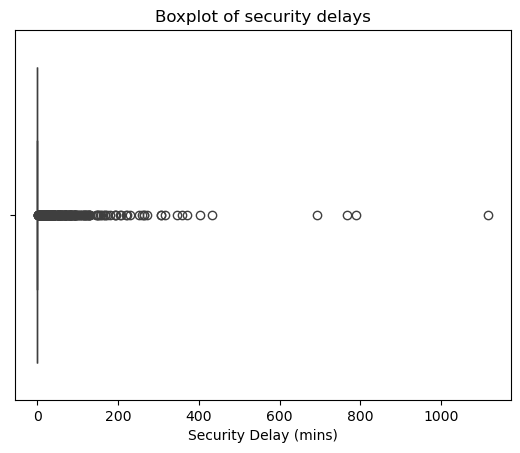

Mean = 10.627, Median = 0.000


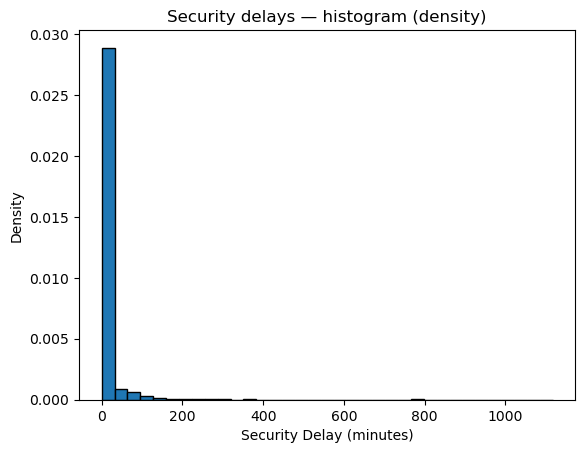

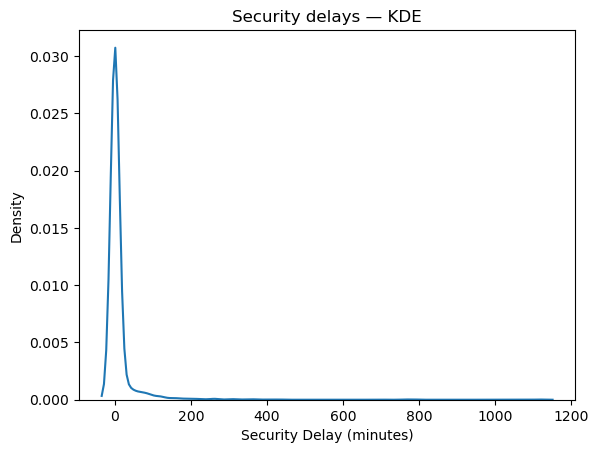

In [119]:
y = delay['security_delay']

fig, ax = plt.subplots()
sns.boxplot(x=y, ax=ax)
ax.set_title("Boxplot of security delays")
ax.set_xlabel("Security Delay (mins)")
plt.show()

mean_val = y.mean()
median_val = y.median()
print(f"Mean = {mean_val:.3f}, Median = {median_val:.3f}")

plt.hist(delay['security_delay'], bins=35, edgecolor='black', density=True)
plt.title("Security delays — histogram (density)")
plt.xlabel("Security Delay (minutes)")
plt.ylabel("Density")
plt.show()

sns.kdeplot(x=delay['security_delay'])
plt.title("Security delays — KDE")
plt.xlabel("Security Delay (minutes)")
plt.ylabel("Density")
plt.show()


The graphs above show that security delays are quite uncommon. However, the boxplot shows that in extreme cases, delays can range from an hour to half a day. The annotations under the boxplot also show that the average security delay is 10 mins, but with a median of 0, it is safe to assume the mean is much higher when there is a security concern. The histogram and KDE plots highlight this perfectly as the delays past 0 are barely noticable. While it may be hard to interpret these graphs, I believe they do a good job of conveying the statistics of security delays at an airport. An explanation for the data may be that security concerns often lead to long processes where it is sometimes required for everyone to deboard a plane to make sure there is no risk before flight.

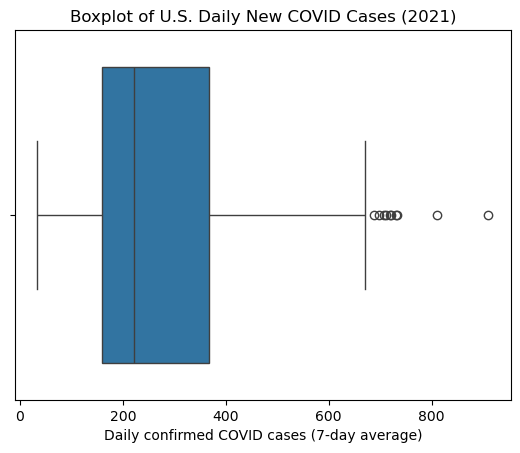

Mean = 267.768, Median = 221.064


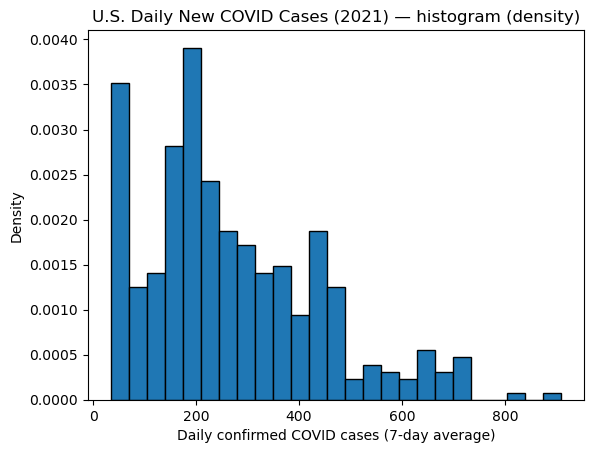

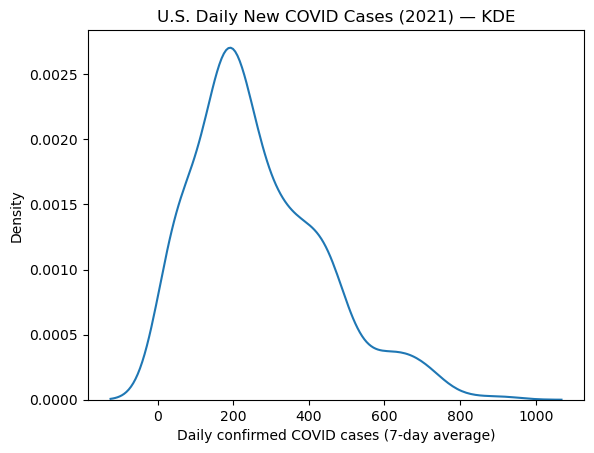

In [115]:
y = covid['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)']

fig, ax = plt.subplots()
sns.boxplot(x=y, ax=ax)
ax.set_title("Boxplot of U.S. Daily New COVID Cases (2021)")
ax.set_xlabel("Daily confirmed COVID cases (7-day average)")
plt.show()

mean_val = y.mean()
median_val = y.median()
print(f"Mean = {mean_val:.3f}, Median = {median_val:.3f}")

plt.hist(covid['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'], bins=25, edgecolor='black', density=True)
plt.title("U.S. Daily New COVID Cases (2021) — histogram (density)")
plt.xlabel("Daily confirmed COVID cases (7-day average)")
plt.ylabel("Density")
plt.show()

sns.kdeplot(x=covid['Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)'])
plt.title("U.S. Daily New COVID Cases (2021) — KDE")
plt.xlabel("Daily confirmed COVID cases (7-day average)")
plt.ylabel("Density")
plt.show()


The data shows, that most days in 2021, there were about 150 to 400 confirmed new cases of COVID-19 in the United States. The annotated boxplot shows that the median is lower than the mean because there are some days in which the number of confirmed cases spiked. The histograms and KDE highlight an almost normal-like distribution, with most days falling around the 200 confirmed cases mark. This dataset was much easier to interpret after I filted out some years and most countries, especially in contrast to the flight delay dataset.